In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# read your csv
df = pd.read_csv("../data/geocoded_data/merged_2021_2025.csv")

# keep only valid coordinates
df = df[df["ok"] == True]
df = df.dropna(subset=["lat", "lng"])

print(df.shape)
df.head()


C:\Users\shrey\AppData\Local\Temp\ipykernel_39704\1827977272.py:6: DtypeWarning: Columns (1,3,4,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/geocoded_data/merged_2021_2025.csv")


(443308, 19)


,Opened,Description,Address,Zip Code,Closed Date 1,Closed Date 2,Status,Number,closed,resolution_time_hours,has_closure_time,zip_clean,zip_int,address_norm,lat,lng,ok,year,Short Description
0,2021-03-02 13:30:00,Information on How to Request an Account Adjus...,"4501 Dudley LN NW, Atlanta, 30327",30327,2021-09-13 11:28:56,NaN,Resolved,CS0063095,2021-09-13 11:28:56,4677.982222,True,30327,30327.0,"4501 Dudley LN NW, Atlanta, 30327",33.877556,-84.388201,True,2021,NaN
1,2021-03-03 13:30:00,Information on How to Dispute Your Water and S...,"238 peachtree cir, ATLANTA, 30309",30309,2021-07-15 12:54:21,NaN,Resolved,CS0060088,2021-07-15 12:54:21,3215.405833,True,30309,30309.0,"238 peachtree cir, ATLANTA, 30309",33.795376,-84.386323,True,2021,NaN
2,2021-03-03 13:30:00,Information on How to Dispute Your Water and S...,"3434 Habersham Rd NW, Atlanta, 30305",30305,2022-05-26 09:54:34,NaN,Resolved,CS0026984,2022-05-26 09:54:34,10772.409444,True,30305,30305.0,"3434 Habersham Rd NW, Atlanta, 30305",33.848637,-84.390632,True,2021,NaN
3,2021-03-09 13:30:00,Street Light Bulb Replacement or Street Light ...,"1160 Veltrie Circle, ATLANTA, 30311",30311,2021-04-14 15:24:37,NaN,Resolved,CS0001758,2021-04-14 15:24:37,865.910278,True,30311,30311.0,"1160 Veltrie Circle, ATLANTA, 30311",33.723403,-84.475014,True,2021,NaN
4,2021-03-11 13:30:00,Right of Way Maintenance Visibility/Overgrowth...,"2855 elliott cir , ATLANTA, 30305",30305,NaN,2025-06-03 17:47:00,Resolved,CS0056768,2025-06-03 17:47:00,37084.283333,True,30305,30305.0,"2855 elliott cir, ATLANTA, 30305",33.833415,-84.367372,True,2021,NaN


In [2]:
# create geometry column
geometry = [Point(xy) for xy in zip(df["lng"], df["lat"])]

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=geometry,
    crs="EPSG:4326"  # WGS84 lat/lon
)

gdf_points.head()


,Opened,Description,Address,Zip Code,Closed Date 1,Closed Date 2,Status,Number,closed,resolution_time_hours,has_closure_time,zip_clean,zip_int,address_norm,lat,lng,ok,year,Short Description,geometry
0,2021-03-02 13:30:00,Information on How to Request an Account Adjus...,"4501 Dudley LN NW, Atlanta, 30327",30327,2021-09-13 11:28:56,NaN,Resolved,CS0063095,2021-09-13 11:28:56,4677.982222,True,30327,30327.0,"4501 Dudley LN NW, Atlanta, 30327",33.877556,-84.388201,True,2021,NaN,POINT (-84.3882 33.87756)
1,2021-03-03 13:30:00,Information on How to Dispute Your Water and S...,"238 peachtree cir, ATLANTA, 30309",30309,2021-07-15 12:54:21,NaN,Resolved,CS0060088,2021-07-15 12:54:21,3215.405833,True,30309,30309.0,"238 peachtree cir, ATLANTA, 30309",33.795376,-84.386323,True,2021,NaN,POINT (-84.38632 33.79538)
2,2021-03-03 13:30:00,Information on How to Dispute Your Water and S...,"3434 Habersham Rd NW, Atlanta, 30305",30305,2022-05-26 09:54:34,NaN,Resolved,CS0026984,2022-05-26 09:54:34,10772.409444,True,30305,30305.0,"3434 Habersham Rd NW, Atlanta, 30305",33.848637,-84.390632,True,2021,NaN,POINT (-84.39063 33.84864)
3,2021-03-09 13:30:00,Street Light Bulb Replacement or Street Light ...,"1160 Veltrie Circle, ATLANTA, 30311",30311,2021-04-14 15:24:37,NaN,Resolved,CS0001758,2021-04-14 15:24:37,865.910278,True,30311,30311.0,"1160 Veltrie Circle, ATLANTA, 30311",33.723403,-84.475014,True,2021,NaN,POINT (-84.47501 33.7234)
4,2021-03-11 13:30:00,Right of Way Maintenance Visibility/Overgrowth...,"2855 elliott cir , ATLANTA, 30305",30305,NaN,2025-06-03 17:47:00,Resolved,CS0056768,2025-06-03 17:47:00,37084.283333,True,30305,30305.0,"2855 elliott cir, ATLANTA, 30305",33.833415,-84.367372,True,2021,NaN,POINT (-84.36737 33.83342)


In [3]:
import os
import requests
import zipfile

url = "https://www2.census.gov/geo/tiger/TIGER2020/TABBLOCK20/tl_2020_13_tabblock20.zip"
zip_path = "tl_2020_13_tabblock20.zip"
out_dir = "tl_2020_13_tabblock20"

# download
if not os.path.exists(zip_path):
    r = requests.get(url, stream=True)
    r.raise_for_status()
    with open(zip_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

# unzip
if not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(out_dir)

# read shapefile
shp_path = os.path.join(out_dir, "tl_2020_13_tabblock20.shp")
blocks_ga = gpd.read_file(shp_path)

print(blocks_ga.columns)


Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLOCKCE20', 'GEOID20',
       'GEOIDFQ20', 'NAME20', 'MTFCC20', 'UR20', 'UACE20', 'FUNCSTAT20',
       'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'HOUSING20', 'POP20',
       'geometry'],
      dtype='object')


In [5]:
import requests
import zipfile
import os

url_place = "https://www2.census.gov/geo/tiger/TIGER2020/PLACE/tl_2020_13_place.zip"
zip_place = "tl_2020_13_place.zip"
out_place = "tl_2020_13_place"

# 1) Download
if not os.path.exists(zip_place):
    print("Downloading PLACE shapefile...")
    r = requests.get(url_place, stream=True)
    r.raise_for_status()
    with open(zip_place, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

# 2) Unzip
if not os.path.exists(out_place):
    os.makedirs(out_place, exist_ok=True)
    with zipfile.ZipFile(zip_place, "r") as z:
        z.extractall(out_place)

print("Download complete.")


Download complete.


In [6]:
import geopandas as gpd
import os

place_path = os.path.join(out_place, "tl_2020_13_place.shp")
places = gpd.read_file(place_path)

print(places.head())


  STATEFP PLACEFP   PLACENS    GEOID         NAME          NAMELSAD LSAD  \
0      13   22752  02406378  1322752       Dexter       Dexter town   43   
1      13   24488  02403513  1324488       Dudley       Dudley city   25   
2      13   25300  02403532  1325300  East Dublin  East Dublin city   25   
3      13   52500  02406183  1352500     Montrose     Montrose town   43   
4      13   36696  02403802  1336696       Harlem       Harlem city   25   

  CLASSFP PCICBSA PCINECTA  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT  \
0      C1       N        N  G4110        A   1987890   47045  +32.4331950   
1      C1       N        N  G4110        A   8827898   33640  +32.5334829   
2      C1       N        N  G4110        A  10925435  507602  +32.5469249   
3      C1       N        N  G4110        A   4181073   16200  +32.5592295   
4      C1       N        N  G4110        A  16748090   42274  +33.4353393   

       INTPTLON                                           geometry  
0  -083.059

<Axes: >

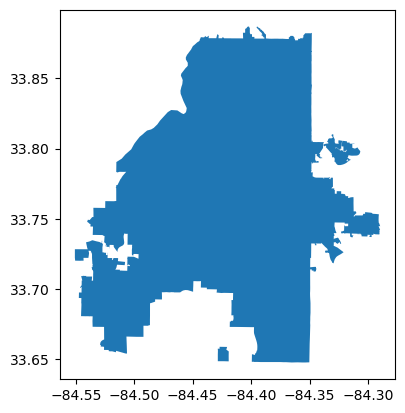

In [7]:
atlanta_city = places[places["NAME"] == "Atlanta"].copy()

atlanta_city.plot()


In [8]:
# Make sure CRS matches
blocks_ga = blocks_ga.to_crs(atlanta_city.crs)

# Clip blocks using Atlanta boundary
atlanta_blocks = gpd.clip(blocks_ga, atlanta_city)

print("Total Atlanta blocks:", len(atlanta_blocks))


Total Atlanta blocks: 6575


<Axes: >

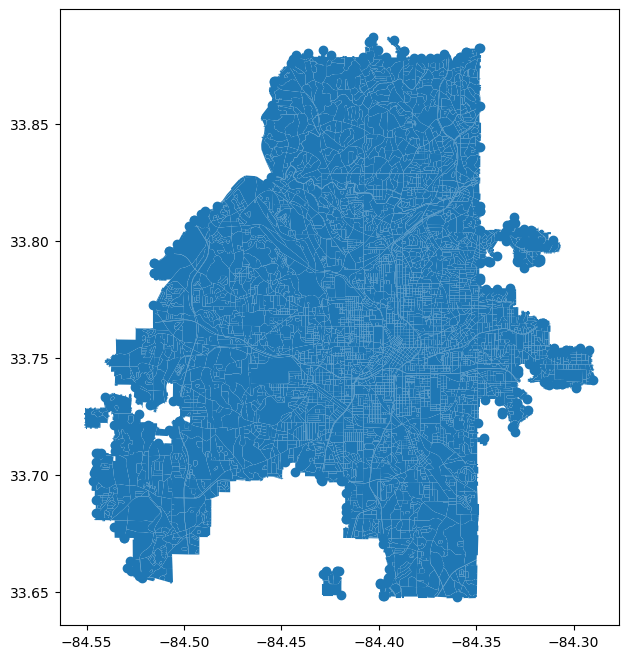

In [9]:
atlanta_blocks.plot(figsize=(8,8))


In [10]:
# Georgia State Plane West (feet)
atlanta_blocks = atlanta_blocks.to_crs("EPSG:2240")
gdf_points = gdf_points.to_crs("EPSG:2240")


In [11]:
joined = gpd.sjoin(
    gdf_points,
    atlanta_blocks,
    how="left",
    predicate="within"
)


In [12]:
print(joined["GEOID20"].isna().sum())


6066


In [13]:
print(len(gdf_points))


443308


In [14]:
print(gdf_points.crs)
print(atlanta_blocks.crs)


EPSG:2240
EPSG:2240


<Axes: >

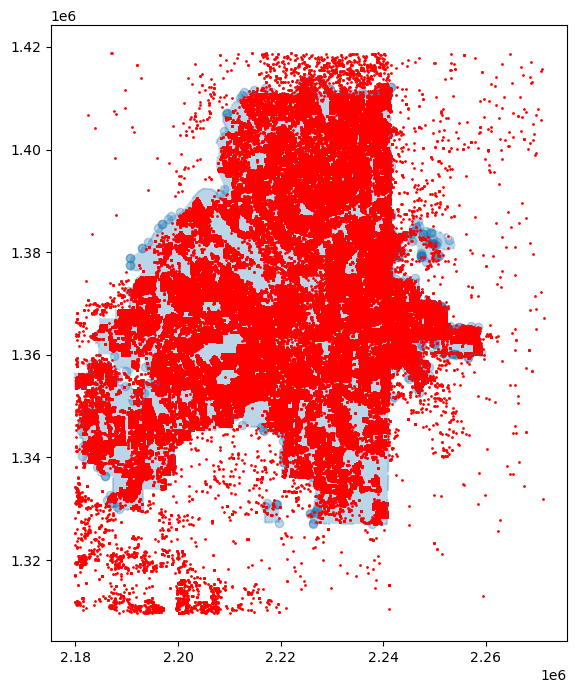

In [15]:
base = atlanta_blocks.plot(figsize=(8,8), alpha=0.3)
gdf_points.plot(ax=base, markersize=1, color="red")


In [16]:
points_in_city = gpd.sjoin(
    gdf_points,
    atlanta_city.to_crs(gdf_points.crs),
    predicate="within",
    how="inner"
)

print("Points inside Atlanta:", len(points_in_city))


Points inside Atlanta: 437242


In [17]:
atlanta_boundary = atlanta_city.to_crs(gdf_points.crs)

gdf_points_atl = gdf_points[
    gdf_points.within(atlanta_boundary.geometry.iloc[0])
].copy()

print(len(gdf_points_atl))  # should be 437242


437242


In [18]:
atlanta_blocks = atlanta_blocks.to_crs("EPSG:2240")
gdf_points_atl = gdf_points_atl.to_crs("EPSG:2240")


In [19]:
joined = gpd.sjoin(
    gdf_points_atl,
    atlanta_blocks,
    how="left",
    predicate="within"
)

print("Unmatched after filtering:",
      joined["GEOID20"].isna().sum())


Unmatched after filtering: 0


In [20]:
block_counts = (
    joined.groupby("GEOID20")
    .size()
    .reset_index(name="complaint_count")
)

atlanta_blocks = atlanta_blocks.merge(
    block_counts,
    on="GEOID20",
    how="left"
)

atlanta_blocks["complaint_count"] = (
    atlanta_blocks["complaint_count"].fillna(0)
)


In [21]:
print("Total blocks:", len(atlanta_blocks))
print("Blocks with complaints:",
      (atlanta_blocks["complaint_count"] > 0).sum())


Total blocks: 6575
Blocks with complaints: 5414


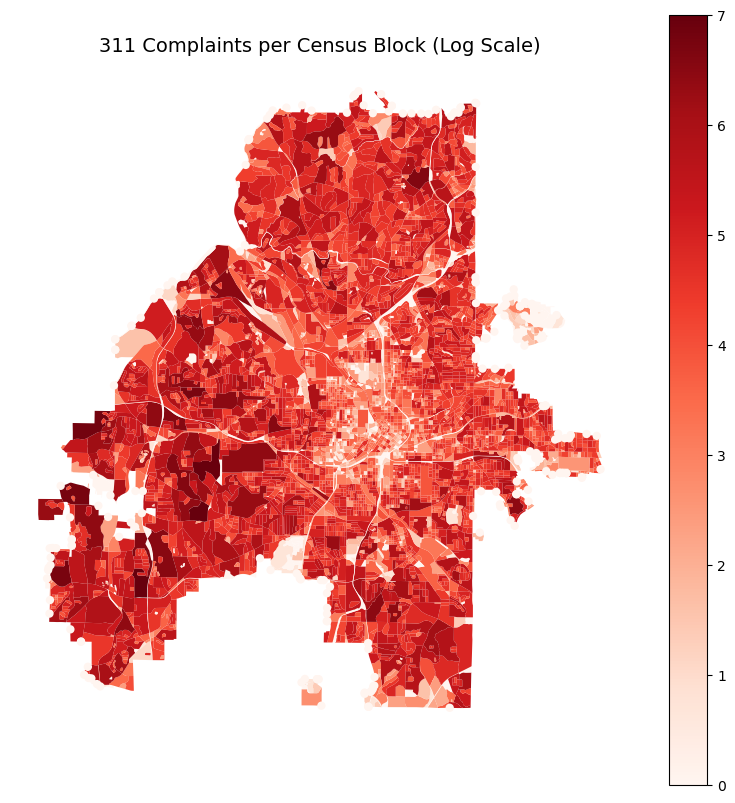

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# log transform
atlanta_blocks["log_count"] = np.log1p(atlanta_blocks["complaint_count"])

fig, ax = plt.subplots(figsize=(10,10))

atlanta_blocks.plot(
    column="log_count",
    cmap="Reds",
    linewidth=0,
    legend=True,
    ax=ax
)

ax.set_title("311 Complaints per Census Block (Log Scale)", fontsize=14)
ax.axis("off")

plt.show()


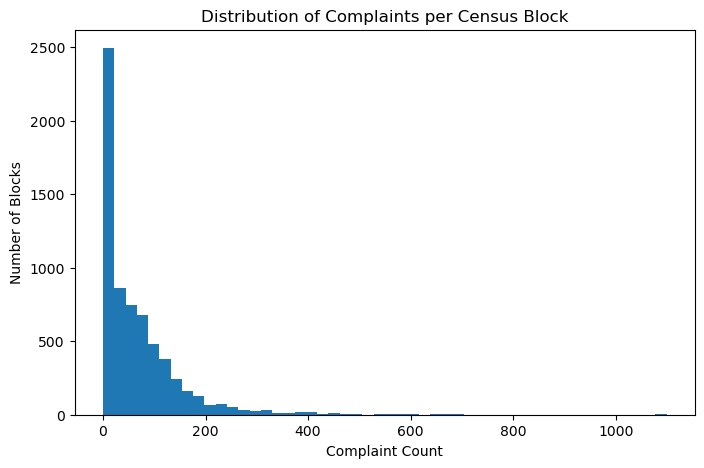

In [23]:
plt.figure(figsize=(8,5))

plt.hist(
    atlanta_blocks["complaint_count"],
    bins=50
)

plt.title("Distribution of Complaints per Census Block")
plt.xlabel("Complaint Count")
plt.ylabel("Number of Blocks")

plt.show()


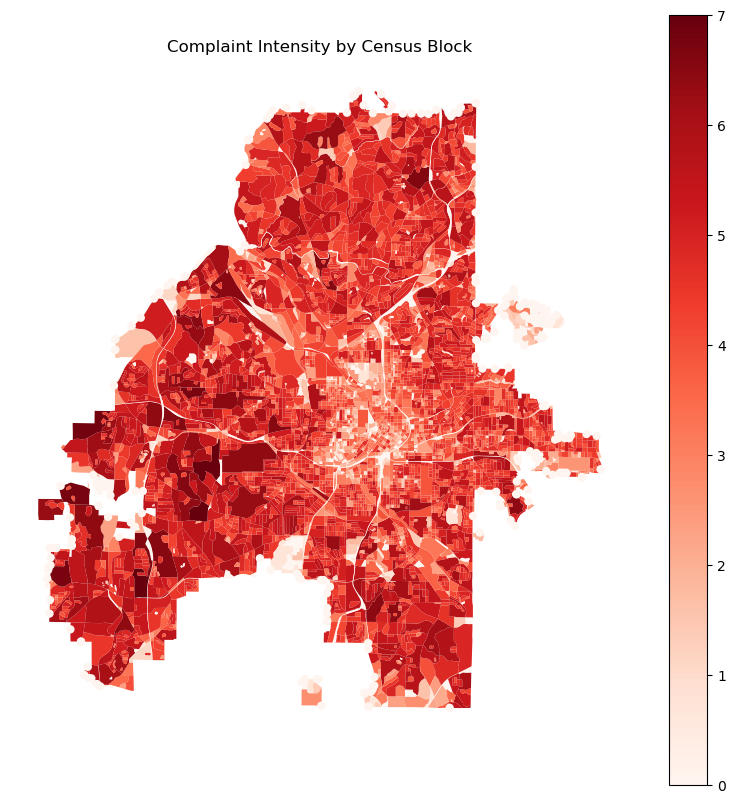

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

atlanta_blocks.plot(
    column="log_count",
    cmap="Reds",
    edgecolor="none",
    legend=True,
    ax=ax
)

ax.set_title("Complaint Intensity by Census Block")
ax.axis("off")

plt.show()


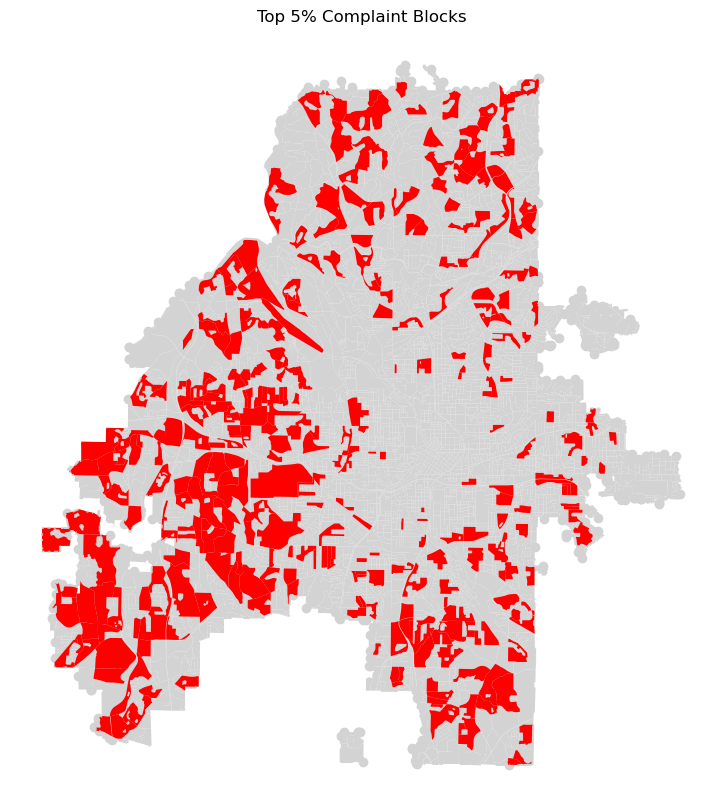

In [25]:
threshold = atlanta_blocks["complaint_count"].quantile(0.95)

high_blocks = atlanta_blocks[
    atlanta_blocks["complaint_count"] >= threshold
]

fig, ax = plt.subplots(figsize=(10,10))

atlanta_blocks.plot(
    color="lightgrey",
    ax=ax
)

high_blocks.plot(
    color="red",
    ax=ax
)

ax.set_title("Top 5% Complaint Blocks")
ax.axis("off")

plt.show()


<Axes: >

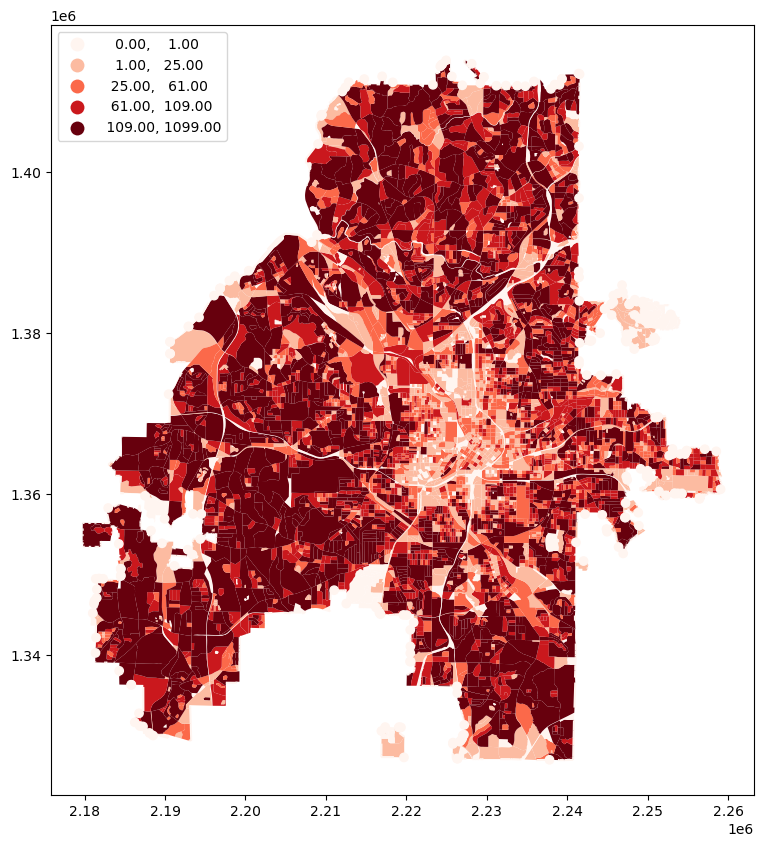

In [26]:
atlanta_blocks.plot(
    column="complaint_count",
    scheme="quantiles",
    k=5,
    cmap="Reds",
    legend=True,
    figsize=(10,10)
)
